# Details - Occlusion

This notebook complements the [docs](https://luminovo.gitlab.io/public/midnite/latest/visualization.html) and explains the occlusion method in detail.

The method occludes parts of the input image and measures the effect on the prediciton, creating an importance heatmap of the input image.

In [1]:
%%capture
%matplotlib inline  
%load_ext autoreload
%autoreload 2  
%cd ../src

## Preparation: Load Pretrained Model and Example Data

As in other notebooks, we use a pretrained alexnet.

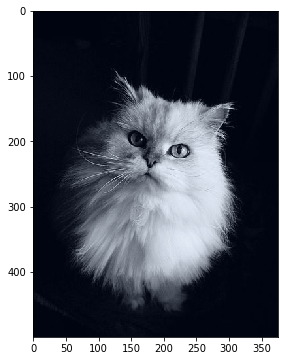

In [2]:
from torchvision import models
import data_utils
import midnite
from plot_utils import show, show_normalized, show_heatmap


alexnet = models.alexnet(pretrained=True)
alexnet.eval().to(midnite.get_device());

example_img = data_utils.get_example_from_path(
    "../data/imagenet_example_283.jpg",
    data_utils.DataConfig.ALEX_NET
)

show_normalized(example_img)

## Neuron Selection and Split
In the following examples, we measure the effect on the neuron for the target output class (283).
This yields us a heatmap of the influence on the correct prediction.

The input image is split spatially (`SpatialSplit`), i.e. we _stride_ through the the spatial positions, doing a measurement at every step. The _chunk size_ controls which parts of the image are occluded. 

## Paramters: Chunk Size and Stride
To be generic for any split, _chunk size_ and _stride_ are three-dimensional tuples for (depth, height, width). In our example, the depth dimension is irrelevant, since our split is spatial.

A small _chunk size_ creates a nosiy, fine-grained heatmap, as only small parts of the image features are occluded. On the other hand, a larger chunk size rather shows which _areas_ are important. 

100%|██████████| 1850/1850 [00:06<00:00, 306.69it/s]


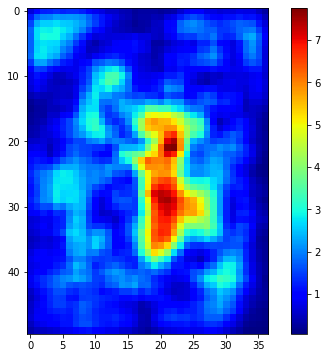

100%|██████████| 1850/1850 [00:06<00:00, 303.24it/s]


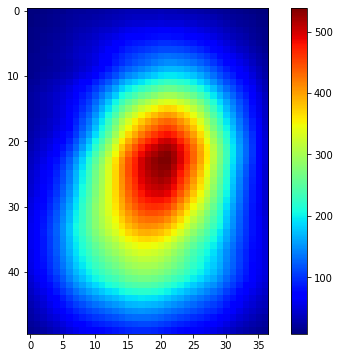

In [3]:
import midnite
from midnite.visualization.base import *

# Use 'cpu' if you have no GPU available
with midnite.device('cuda:0'):
    show_heatmap(Occlusion(
        alexnet,
        SplitSelector(NeuronSplit(), [283]),
        SpatialSplit(),
        chunk_size=(1, 3, 3),
        stride=(1, 10, 10),
    ).visualize(example_img))
    
    show_heatmap(Occlusion(
        alexnet,
        SplitSelector(NeuronSplit(), [283]),
        SpatialSplit(),
        chunk_size=(1, 15, 15),
        stride=(1, 10, 10),
    ).visualize(example_img))

The `stride` on the other hand only controls the granularity of the output image - but keep in mind that smaller strides use much more performance:

100%|██████████| 20750/20750 [01:07<00:00, 308.08it/s]


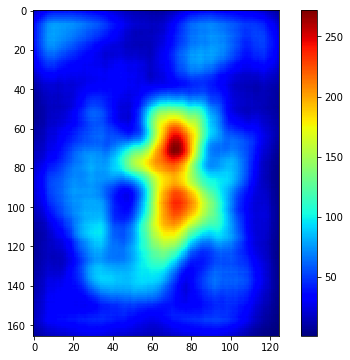

In [4]:
with midnite.device('cuda:0'):
    show_heatmap(Occlusion(
        alexnet,
        SplitSelector(NeuronSplit(), [283]),
        SpatialSplit(),
        chunk_size=(1, 15, 15),
        stride=(1, 3, 3),
    ).visualize(example_img))